
## CNN With Custom Images

The dataset contains 2 folders - Infected - Uninfected

And a total of 27,558 images.


This Dataset is taken from the official NIH Website: https://ceb.nlm.nih.gov/repositories/malaria-datasets/ 

Regülazition methodları olarak dropout, batchnormalization, early stopping, l1 ve l2 sıralayabiliriz. DL de l2 daha çok kullanılıyor yani riched. ağırlıkları baskılıyor. filtre veya nöronların ağırlıklarını baskılıyor. 

Batchnormalization normal normalization dan farkı biz norm. yapınca amacımız input değerlerinin mean 0, varyans 1 yapmaktır. Böyle olunca mesela ReLu da aşağıdaki gibi 0 a kadar türev 0, sonrasında ise 1 oluyor. norm. yapınca mean 0 ve varyans 1 olacak şekilde inputları iki taraflı dağıtıyor. negatifleri sıfırlıyor, sadece pozitiflerin katkısı oluyor. inputta normalizationı yapıyoruz ancak ara layerlarda bunu yapmak mantıklı değil. ara layerlarda activation func var. batch normalization da gamma ile mean çarpıp beatyı ilave ediyoruz. model ilk başta bunları random olarak atıyor sonra her batch sonrasında kendisi öğreniyor. bunları yaparken flexibility dokunmuyoruz. model bunlar ile oynayarak inputların varyansını artırabiliyor çünkü varyans ne kadar büyükse o kadar daha çok datayı kapsıyor. bunlar öğrenilebilir parametre olduğundan dolayı her backpropagation sonrasında bunlar güncelleniyor. 

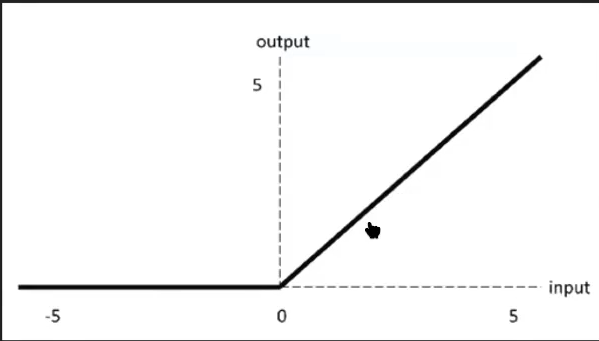

Dropout layer kendisine gelen inputların belli bir kısmını shut off yapıyor. İki tür dropout var. Biri element wise diğeri ise special. Specialda dropouttan önceki layerdaki inputlare değil de nöronları sıfırlıyor. element wise da ise komple nöronları sıfırlama yerine herbir filtrenin içindeki değerleri bizim verdiğimiz orana göre sıfırlıyor. 

Modelimizde eğitilebilir parametresi olmayan layerlar güncellenemez max pooling gibi. 

Data Augmentation denilen bir regül. methodu var. bunu yapınca elimizdeki data sayısı artmıyor. modeli overfittingten kurtarmak için bunu yapıyoruz.  

Colab te önce drive atmalı ve sonrasında mouth etmeliyiz. 

os library bizim operating system ile etkileşime geçmemize yardımcı olur.

In [2]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread
import warnings
warnings.filterwarnings('ignore')

In [3]:
pwd

'C:\\Users\\HP\\DATA_SCIENCE_COURSE_NOTES\\2. Classes_Lab\\8. DeepLearning'

aşağıdaki path ile cell image klasörü içine gittim ve orada kaldım.
os.listdir çalıştırınca bu path deki klasörleri bana veriyor. görüldüğü gibi train ve test olmak üzere 2 klasör var.

daha sonra bu path bu 2 klasörü ekliyorum /test/ ve /train/ olarak.

ve son olarak da bu yeni pathların içindeki 2 ayrı klasörü ulaşıyoruz. resimlerin olduğu klasörlere girmek zorunda değilim. Train ve test setlerinde 'uninfected', 'parasitized' isimli 2' ser adet klasor daha var. Ilerleyen asamalarda flow_from_directory fonksiyonunu cagiracagiz; bu fonksiyon klasorlerin icindeki resimleri ayri class' lar olarak cekecek.

In [4]:
my_data_dir = 'C:\\Users\\HP\\DATA_SCIENCE_COURSE_NOTES\\2. Classes_Lab\\8. DeepLearning\cell_images'

In [5]:
# CONFIRM THAT THIS REPORTS BACK 'test', and 'train'
os.listdir(my_data_dir) 

['test', 'train']

In [6]:
test_path = my_data_dir+'/test/'
train_path = my_data_dir+'/train/'

In [7]:
os.listdir(test_path)

['parasitized', 'uninfected']

In [8]:
os.listdir(train_path)

['parasitized', 'uninfected']

In [9]:
os.listdir(train_path+'parasitized')[:20]  # ilk 20 tanesine bakıyoruz.

['C100P61ThinF_IMG_20150918_144104_cell_162.png',
 'C100P61ThinF_IMG_20150918_144104_cell_163.png',
 'C100P61ThinF_IMG_20150918_144104_cell_164.png',
 'C100P61ThinF_IMG_20150918_144104_cell_165.png',
 'C100P61ThinF_IMG_20150918_144104_cell_166.png',
 'C100P61ThinF_IMG_20150918_144104_cell_167.png',
 'C100P61ThinF_IMG_20150918_144104_cell_168.png',
 'C100P61ThinF_IMG_20150918_144104_cell_169.png',
 'C100P61ThinF_IMG_20150918_144104_cell_170.png',
 'C100P61ThinF_IMG_20150918_144104_cell_171.png',
 'C100P61ThinF_IMG_20150918_144348_cell_138.png',
 'C100P61ThinF_IMG_20150918_144348_cell_139.png',
 'C100P61ThinF_IMG_20150918_144348_cell_140.png',
 'C100P61ThinF_IMG_20150918_144348_cell_141.png',
 'C100P61ThinF_IMG_20150918_144348_cell_142.png',
 'C100P61ThinF_IMG_20150918_144348_cell_143.png',
 'C100P61ThinF_IMG_20150918_144823_cell_157.png',
 'C100P61ThinF_IMG_20150918_144823_cell_158.png',
 'C100P61ThinF_IMG_20150918_144823_cell_159.png',
 'C100P61ThinF_IMG_20150918_144823_cell_160.png',


In [10]:
os.listdir(train_path+'parasitized')[7]

'C100P61ThinF_IMG_20150918_144104_cell_169.png'

In [12]:
para_cell = train_path+'parasitized'+'/C100P61ThinF_IMG_20150918_144104_cell_169.png'

Train dosyasinin icinden 7. resmi cagirdik ve Bu resmin path yolunu bir asagidaki kodda para_cell degiskenine atadık. daha sonra bunu okuduk ve imagene baktık. 

imread -->Resimleri file' dan okur, array' e cevirir. Daha sonra bu array' i image olarak yazdirabiliriz.

imread' i bir degiskene atayip imshow ile gorsele cevirdik.

Bu resmin boyutu 124x154 imis, 3 channel' i varmis (RGB=Renkli resim).

In [13]:
imread(para_cell) 

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [14]:
para_img= imread(para_cell)

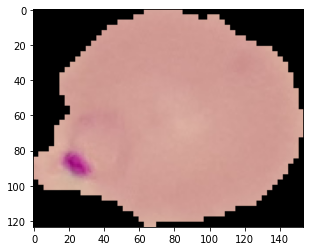

In [15]:
plt.imshow(para_img)

In [16]:
para_img.shape

(124, 154, 3)

input shape farklı demek feature sayıları farklı olması ile aynıdır. baktığımızda bazı input shapelerin farklı olduğunu görüyoruz.

Datadaki resimlerin hepsinin boyutu ayni degil. Bu haliyle model calismaz, cunku modeldeki input_shape'ler farkli olacak. Bunlarin shape'lerini ilerleyen asamalarda esitleyecegiz.

In [17]:
os.listdir(train_path+'uninfected')[:20]

['C100P61ThinF_IMG_20150918_144104_cell_128.png',
 'C100P61ThinF_IMG_20150918_144104_cell_131.png',
 'C100P61ThinF_IMG_20150918_144104_cell_144.png',
 'C100P61ThinF_IMG_20150918_144104_cell_21.png',
 'C100P61ThinF_IMG_20150918_144104_cell_25.png',
 'C100P61ThinF_IMG_20150918_144104_cell_48.png',
 'C100P61ThinF_IMG_20150918_144104_cell_65.png',
 'C100P61ThinF_IMG_20150918_144348_cell_120.png',
 'C100P61ThinF_IMG_20150918_144348_cell_125.png',
 'C100P61ThinF_IMG_20150918_144348_cell_131.png',
 'C100P61ThinF_IMG_20150918_144348_cell_2.png',
 'C100P61ThinF_IMG_20150918_144348_cell_25.png',
 'C100P61ThinF_IMG_20150918_144348_cell_40.png',
 'C100P61ThinF_IMG_20150918_144348_cell_71.png',
 'C100P61ThinF_IMG_20150918_144823_cell_126.png',
 'C100P61ThinF_IMG_20150918_144823_cell_127.png',
 'C100P61ThinF_IMG_20150918_144823_cell_139.png',
 'C100P61ThinF_IMG_20150918_144823_cell_142.png',
 'C100P61ThinF_IMG_20150918_144823_cell_151.png',
 'C100P61ThinF_IMG_20150918_144823_cell_21.png',
 'C100P61T

In [19]:
uninfected_cell_path = train_path+'uninfected/' + os.listdir(train_path+'uninfected')[7]

yukarıdaki gibi uninfected içindeki 8. resmi aldık ve bunun yolu ile birleştirince bu resme giden yolu bulmuş olduk.

In [20]:
imread(uninfected_cell_path)

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

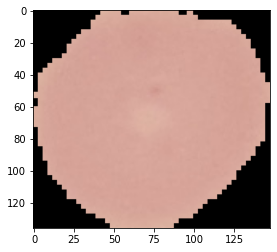

In [21]:
uninfected_cell = imread(uninfected_cell_path)
plt.imshow(uninfected_cell)

**Let's check how many images there are.**

In [22]:
len(os.listdir(train_path+'parasitized')) # train içindeki parasitli resim sayısına baktım.

12480

In [23]:
len(os.listdir(train_path+'uninfected')) # train içindeki parasitli resim sayısına baktım.

12480

**Let's find out the average dimensions of these images.**

In [24]:
uninfected_cell.shape

(136, 148, 3)

In [25]:
para_img.shape

(124, 154, 3)

aşağıdaki kod ile test pathindeki tüm uninfected resimleri dolaşıp bunların shap ve color x ve y ye atıyorum. For döngüsü ile 'uninfected' image' leri imread ile numpy array haline cevirdik. Bu image' ler 3 boyutlu idi (en-boy-kanal sayisi). Bunlarin her birisini img.shape ile sirayla d1, d2 ve _' e atadik. eğer bir variable ile işimiz yoksa onun yerine _ yazıyoruz. En ve boy bilgilerini x ve y listelerine attik.

In [26]:
x= []
y = []
for image in os.listdir(test_path+'uninfected'):
    
    img = imread(test_path+'uninfected/'+image)
    d1, d2, _ = img.shape   #colors yerine _ yazdık.
    x.append(d1)
    y.append(d2)

In [27]:
y[:20]

[118,
 145,
 151,
 145,
 139,
 136,
 160,
 121,
 142,
 121,
 100,
 151,
 139,
 151,
 112,
 124,
 145,
 115,
 166,
 130,
 133,
 130,
 136,
 136,
 124,
 115,
 142,
 190,
 151,
 163,
 112,
 142,
 151,
 127,
 142,
 172,
 151,
 127,
 154,
 91,
 124,
 139,
 124,
 127,
 148,
 118,
 148,
 157,
 139,
 145,
 154,
 163,
 148,
 130,
 160,
 136,
 121,
 169,
 145,
 115,
 106,
 124,
 130,
 112,
 124,
 106,
 112,
 121,
 100,
 115,
 136,
 118,
 127,
 148,
 130,
 118,
 124,
 139,
 133,
 118,
 121,
 127,
 136,
 127,
 124,
 124,
 136,
 130,
 130,
 112,
 127,
 136,
 130,
 124,
 130,
 109,
 169,
 124,
 142,
 127,
 106,
 130,
 97,
 100,
 145,
 106,
 148,
 136,
 136,
 133,
 121,
 133,
 136,
 157,
 133,
 139,
 127,
 139,
 151,
 157,
 148,
 163,
 145,
 136,
 127,
 130,
 160,
 133,
 130,
 121,
 136,
 145,
 121,
 142,
 148,
 148,
 127,
 139,
 148,
 148,
 151,
 160,
 154,
 145,
 139,
 127,
 121,
 106,
 106,
 145,
 112,
 130,
 124,
 139,
 145,
 142,
 151,
 130,
 118,
 133,
 154,
 136,
 139,
 121,
 142,
 148,
 136,


In [ ]:
x[:20]

y degerlerine baktik, hepsi birbirinden farkli. Scatterplot ile de degerlerin yogunlastigi yerlere baktik. Resimleri ayni boyuta getirmek icin orta degerde bir boyut secmemiz gerekir. Bu yuzden x ve y' nin mean degerlerine baktik ve boyutun 130x130 olmasinda karar kıldık. tüm resimleri buna göre scale up veya down yapacağım.

<AxesSubplot:>

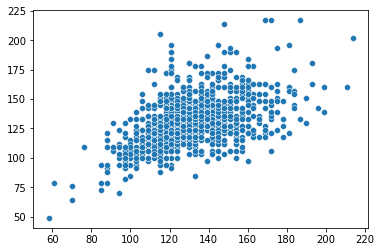

In [28]:
sns.scatterplot(x,y)

In [29]:
np.mean(x)

130.92538461538462

In [30]:
np.mean(y)

130.75

In [31]:
image_shape = (130,130,3)

## Preparing the Data for the model

In [32]:
uninfected_cell.max()  # uninfected_cell resmin array veriyor bize. burada scale edilmiş olduğunu görüyoruz.

0.88235295

In [33]:
para_img.max()

0.8901961

In [34]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [35]:
# help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.image_data_generator.ImageDataGenerator)
 |  ImageDataGenerator(featurewise_center=False, samplewise_center=False, featurewise_std_normalization=False, samplewise_std_normalization=False, zca_whitening=False, zca_epsilon=1e-06, rotation_range=0, width_shift_range=0.0, height_shift_range=0.0, brightness_range=None, shear_range=0.0, zoom_range=0.0, channel_shift_range=0.0, fill_mode='nearest', cval=0.0, horizontal_flip=False, vertical_flip=False, rescale=None, preprocessing_function=None, data_format=None, validation_split=0.0, dtype=None)
 |  
 |  Generate batches of tensor image data with real-time data augmentation.
 |  
 |   The data will be looped over (in batches).
 |  
 |  Args:
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_s

'uninfected' ve 'parasitized' max degerlerine baktik, degerler 0-255 arasinda degil zaten scale edilmis durumdalar. Bu yuzden scale uygulamamiza gerek yok. Eger scale edilmemis olsaydi asagida rescale=1/255 kodunu da calistiracaktik ve resimlerin pixel degerlerini 255 oraninda kucultecekti.

In [36]:
image_gen = ImageDataGenerator(rotation_range=15, 
                               width_shift_range=0.10, 
                               height_shift_range=0.10, 
                               #rescale=1/255, 
                               shear_range=0.1, 
                               zoom_range=0.1, 
                               horizontal_flip=True, 
                               fill_mode='nearest')

rotation_rate --->Resimleri en fazla su oranda rotate et. (Burada 0-15 arasinda rotate eder.)

width_shift_range and height_shift_range ---> Enini ve boyunu verilen orandan fazla kaydirma (Burada 0.10' a kadar istedigi oranda kaydirabilir. 0.10 verdigimiz max deger. Her resimde en yuksek 0.10 olacak sekilde rastgele bir deger secer)

shear_range --->Resmi yirtar.

zoom_range --->En fazla bu oranda zoom in veya zoom out yap.


görüntü işlemede scale up ve down çok ilginç bir olay. şöyleki; Image' lerde ratio, en ve boyun birbirine oranidir. ratio bozunca resim çarpılıyor. Scale islemi yaparken ratio sabit tutulmazsa resimdeki görüntü bozulur. Tensorflow bu sorunun önüne ImageDataGenerator ile gecmis. Bu class, resimleri scale ederken 'smart resize' denen bir ozellik kullanir. Bununla resimler rastgele sekilde bozulur fakat data sayisi artmaz.

ImageDataGenerator, resimleri rastgele bozarak mukemmel olmaktan cikarir, cunku gercek hayatta karsimiza cikan resimler her zaman yuksek kalitede olmayabilir. ImageDataGenerator icindeki bircok parametre de bunun icin vardir. Bizim verdigimiz ölçülerde resmi bozar (Resmi karartir, zoom yapar, genisligi degistirir, rotate eder...) Bu sekilde model, kötü resimlerle egitilir ve genel bilgi alarak resmi ezberlemez. 

ImageDataGeneratorda realtime data augmentation(on the fly augmentation) resimlerin tamamini bozup sonra bunları memory' de biryerde tutmaz. Bu islemi batch batch yapar ve her batch icin rastgele yapar. Tum batch' i rastgele islemlerle donusturup onu return eder, orjinal datayi hicbir sekilde modele vermez. Orjinal resmi modele göstermez. sadece distorted edilmiş resimleri modele verir. 

ImageDataGenerator içindeki parametrelerin hepsini aynı anda tüm resme yapmıyor hangilerini uygulayacağına o anda karar veriyor yani batch batch seçiyor. Bir batch' in sirasi gelmeden karar vermez, islem baslarken karar verir.

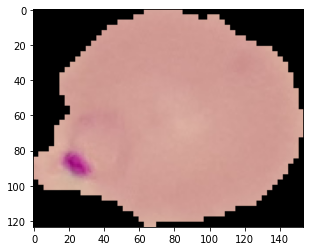

In [37]:
plt.imshow(para_img)

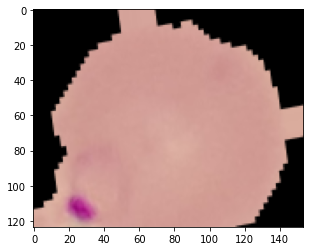

In [38]:
plt.imshow(image_gen.random_transform(para_img))

ImageDataGenerator class' inin random_transform denen bir metodu var. Yukaridaki image' i bunun icine verdi. Bu image' i rastgele bir bicimde degistirdi. (Gözlemlerimize göre; zoom in yapmis, rotate etmis..)

flow_from_directory__ ile train ve test klasorlerinin altindaki resimleri okuduk. path bilgisini train' in icine kadar verdik, alt klasörleri kendisi okudu. Bu fonksiyon hangi resmi hangi klasörün altinda okuduysa bu bilgiyi aklinda tutar. Cikti olarak kac class ve kac image var bilgisini verdi.

path verince bu klasörün içindeki resimlera bakıyor, isimlerini, nerede olduğunu, hangi class ait olduklarını biliyor. her batchi sırası geldiğinde okuyor. ImageDataGenerator resimlerimizi okudu fakat memory' sine atmadi cunku cok fazla resim var ve buna hafizasi yetmez. Yani sadece resimlerin isimlerini, class' larini ve nerede olduklarini biliyor. Her batch icin sırası geldiginde okuma islemini yapacak.

resize --->Resimler standart yollarla scale edilirken ratio bozulur. Bu cogu zaman problem olmaz ama GAN ile egitim yapiliyorsa problemdir. Cünkü GAN, kendisine verilen datayi birebir kopyalamaya calisir. Xpreserve_acpect_ratio  ile ratio bozulmadan islem yapilirsa da resimler istedigimiz boyutta olmaz. Çünkü resize fonksiyonu image' leri crop etmez, sadece scale up veya scale down yapar. Bu sorunlardan dolayi Tensorflow 

smart_resize fonksiyonunu gelistirmistir. Bu fonksiyon ratio' yu bozmadan istedigimiz boyutlarda resim verir. Bu islemi ImageDataGenerator otomatik olarak yapar.

In [39]:
image_gen.flow_from_directory(train_path)

Found 24958 images belonging to 2 classes.


In [40]:
image_gen.flow_from_directory(test_path)

Found 2600 images belonging to 2 classes.


# Creating the Model

In [72]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3),input_shape=image_shape, activation='relu',))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(128))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [94]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 128, 128, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 62, 62, 64)        18496     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 31, 31, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 29, 29, 64)        36928     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 14, 14, 64)      

## Early Stopping

In [95]:
from tensorflow.keras.callbacks import EarlyStopping

In [96]:
early_stop = EarlyStopping(monitor='val_loss', patience=5)

## Training the Model

In [97]:
#help(image_gen.flow_from_directory)

Yukarida gosterdigimiz flow_from_directory__' i bir degiskene atadik. Resimleri train_path' ten al; sonraki kodda da ayni islemi test_path icin yaptik.

target_size=(130,130) ---> Yukarida tanimladigimiz image_size' i buraya vermedik cunku onda en-boy-z degeri vardi. Fakat burda z degeri isimize yaramayacak, resimleri nasil rescale edecekse o bilgiyi istiyor. Bu yuzden sadece boyutlari verdik.

color_mode='rgb' ---> Resimler renkli

batch_size=batch_size ---> 32 yerine 64 de verebilirdik fakat o zaman GPU memory' i cok yorar.Genelde CNN' de 64' ten yukari yapilmaz, 8-64 arasi verilir.

class_mode='binary' ---> Datada 2 class var.

shuffle=True ---> Resimleri sirayla degil karisik al. Bir class' i bitirip digerine gecmez, karisik olarak alir. shuffle ederken de bu seede göre yap diyorum. 


In [ ]:
batch_size = 32
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=(130,130),
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

In [ ]:
test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=(130,130),
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary', shuffle=True, seed=42)

batch_size = 16
train_image_gen = image_gen.flow_from_directory(train_path,
                                               target_size=image_shape[:2],
                                                color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

test_image_gen = image_gen.flow_from_directory(test_path,
                                               target_size=image_shape[:2],
                                               color_mode='rgb',
                                               batch_size=batch_size,
                                               class_mode='binary')

train_image_gen__ ve __test_image_gen, hangi resim nerde bilgisini hafizalarinda tutuyorlar; resimlerin kendisini hafizalarina yüklemediler. bunu batch sırası gelince yapacak.

In [100]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [101]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [ ]:
STEP_SIZE_TRAIN=train_image_gen.n//train_image_gen.batch_size
STEP_SIZE_TEST=test_image_gen.n//test_image_gen.batch_size

In [ ]:
STEP_SIZE_TRAIN, STEP_SIZE_TEST

Yukarida total image sayisini batch' e böldük ve her bir epoch' un kac iterasyon yapacagini bulduk. Train setinde 779 iterasyon olacakmis. Eger 779 küsur bir sayi cikarsa model bunu 780' e tamamlar. Modele Eger küsuratli bir sayi cikarsa tamamlama, at dedik. Resimleri rastgele sectigi icin tamamlama kisminda ayni resmi bir daha secmesin diye bu islemi yaptik. Evaluate isleminde de aynisini yapacagiz.

!!! BURAYI ÇALIŞTIRMAYALIM.

results = model.fit(train_image_gen,epochs=20,
                    validation_data=test_image_gen,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_steps=STEP_SIZE_TEST,
                    callbacks=[early_stop])

# Evaluating the Model

In [103]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,val_loss,val_accuracy
0,0.765028,0.555894,0.676724,0.577308
1,0.676100,0.586505,0.664452,0.605769
2,0.671139,0.597404,0.660153,0.615385
3,0.667306,0.601410,0.660128,0.620769
4,0.660645,0.614512,0.656352,0.622308


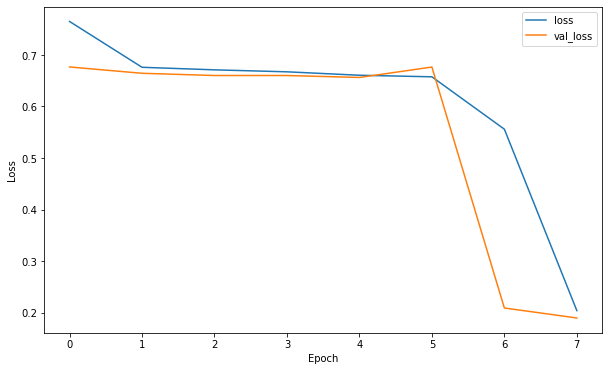

In [104]:
plt.figure(figsize=(10,6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

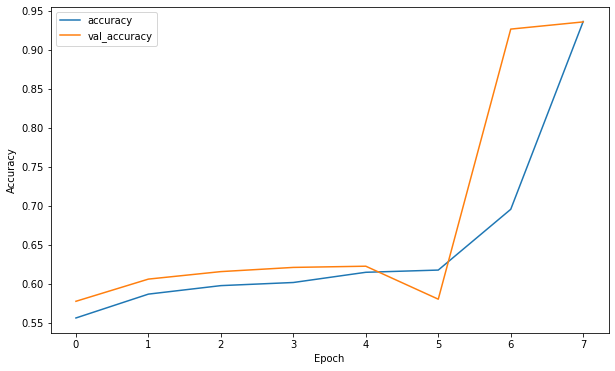

In [105]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [106]:
model.metrics_names

['loss', 'accuracy']

In [107]:
model.evaluate_generator(test_image_gen)

[0.182359978556633, 0.9338461756706238]

In [108]:
from tensorflow.keras.preprocessing import image

In [109]:
pred_probabilities = model.predict_generator(test_image_gen)

In [110]:
pred_probabilities

array([[4.2922911e-04],
       [6.8679762e-01],
       [6.4223586e-03],
       ...,
       [4.8023220e-03],
       [8.2330519e-01],
       [3.0595627e-05]], dtype=float32)

In [111]:
test_image_gen.classes

array([0, 0, 0, ..., 1, 1, 1], dtype=int32)

In [112]:
predictions = pred_probabilities > 0.5

In [113]:
predictions

array([[False],
       [ True],
       [False],
       ...,
       [False],
       [ True],
       [False]])

In [114]:
from sklearn.metrics import classification_report,confusion_matrix

In [115]:
print(classification_report(test_image_gen.classes,predictions))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50      1300
           1       0.50      0.50      0.50      1300

    accuracy                           0.50      2600
   macro avg       0.50      0.50      0.50      2600
weighted avg       0.50      0.50      0.50      2600



In [116]:
confusion_matrix(test_image_gen.classes,predictions)

array([[655, 645],
       [654, 646]])

In [ ]:
model.save('malaria_model.h5')

# Predicting on an Image

In [117]:
para_cell

'/home/katze/datasets/cell_images/train/parasitized/C100P61ThinF_IMG_20150918_144104_cell_169.png'

image' in load_img metodunu kullanarak para_cell' i cagirdik. target_size' da daha önce tanimladigimiz image_shape degiskenini atadik. Boylece shape 130x130x3 oldu.

In [118]:
my_image = image.load_img(para_cell, target_size=image_shape)

In [ ]:
# tf.keras.preprocessing.image.smart_resize(para_img, image_shape)

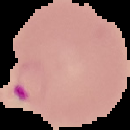

In [119]:
my_image

In [120]:
type(my_image)

PIL.Image.Image

In [121]:
my_image = image.img_to_array(my_image)

In [122]:
type(my_image)

numpy.ndarray

In [123]:
my_image.shape

(130, 130, 3)

Resmimiz 3 boyutlu fakat modelimiz 4 boyutta egitildi. Boyutun 1x130x130x3 olmasi gerekiyor. Burdaki 1 sayisi ile kac resim oldugu bilgisini modele veriyoruz.

!!! Prediction yapilacak olan resim resize edilmeli ve resmin boyutu da modeldeki boyuta cevrilmeli !!!

Numpy' in expand_dims isimli bir fonksiyonu var. Bu fonksiyon, array' in belirtilen yerine bir boyut ekler. Biz 0. axis'e eklemesini söyledik. Böylece boyut 1,130,130,3 olacak ve modelle ayni boyuta gelecek. Bu haliyle sample' i modele verip prediction alabiliriz.

In [124]:
my_image = np.expand_dims(my_image, axis=0)  # 0. axise bir tane dimension ekliyor.

In [125]:
my_image.shape

(1, 130, 130, 3)

In [126]:
model.predict(my_image)

array([[0.00085365]], dtype=float32)

In [127]:
train_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}

In [128]:
test_image_gen.class_indices

{'parasitized': 0, 'uninfected': 1}